#### Project Type: EDA
### Project Number: 0011
## Project Title: СберМаркет

----

  
# **STAGE 5. EXPLORATORY DATA ANALYSIS**

### Import Libraries

---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh') 

### Import Data

---

In [2]:
# Путь к данным
data_path = r'D:/Data_Science_Project/2. Exploratory Data Analysis/[0011] Project 3 - СберМаркет/'

# data_path = r'/media/ruslan/Data/Data_Science_Project/2. Exploratory Data Analysis/[0011] Project 3 - СберМаркет/'

In [3]:
# Загрузка набора данных orders
sber_market_db = pd.read_feather(data_path + '/sber_market_db.file')

# Проверка результата 
sber_market_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125698 entries, 0 to 1125697
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1125698 non-null  int64         
 1   user_id                1125698 non-null  int64         
 2   total_cost             1125698 non-null  float64       
 3   cost                   1125698 non-null  float64       
 4   item_total             1125698 non-null  int64         
 5   promo_total            1125698 non-null  float64       
 6   total_weight           1125698 non-null  int64         
 7   total_quantity         1125698 non-null  int64         
 8   state                  1125698 non-null  category      
 9   shipped_at             1125698 non-null  datetime64[ns]
 10  created_at             1125698 non-null  datetime64[ns]
 11  ship_address_id        1125698 non-null  int64         
 12  store_id               11256

 Разделим набор по типам переменных
 - Количественные: **sber_market_db_num**
 - Категориальные: **sber_market_db_cat**

In [4]:
sber_market_db.columns.to_list()

['id',
 'user_id',
 'total_cost',
 'cost',
 'item_total',
 'promo_total',
 'total_weight',
 'total_quantity',
 'state',
 'shipped_at',
 'created_at',
 'ship_address_id',
 'store_id',
 'delivery_window_id',
 'starts_at',
 'ends_at',
 'time_zone',
 'city',
 'retailer_id',
 'lat',
 'lon',
 'elevator',
 'floor',
 'item_id_replacements',
 'state_replacements',
 'item_id_cancellations',
 'state_cancellations']

In [5]:
sber_market_db_num = sber_market_db[['id',
                                     'user_id',
                                     'total_cost',
                                     'cost',
                                     'item_total',
                                     'promo_total',
                                     'total_weight',
                                     'total_quantity',
                                     'shipped_at',
                                     'created_at',
                                     'ship_address_id',
                                     'store_id',
                                     'delivery_window_id',
                                     'starts_at',
                                     'ends_at',
                                     'city',
                                     'retailer_id',
                                     'lat',
                                     'lon',
                                     'floor',
                                     'item_id_replacements',
                                     'item_id_cancellations',
                                    ]]

sber_market_db_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125698 entries, 0 to 1125697
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1125698 non-null  int64         
 1   user_id                1125698 non-null  int64         
 2   total_cost             1125698 non-null  float64       
 3   cost                   1125698 non-null  float64       
 4   item_total             1125698 non-null  int64         
 5   promo_total            1125698 non-null  float64       
 6   total_weight           1125698 non-null  int64         
 7   total_quantity         1125698 non-null  int64         
 8   shipped_at             1125698 non-null  datetime64[ns]
 9   created_at             1125698 non-null  datetime64[ns]
 10  ship_address_id        1125698 non-null  int64         
 11  store_id               1125698 non-null  int64         
 12  delivery_window_id     11256

In [6]:
sber_market_db_cat = sber_market_db[['state',
                                     'time_zone',
                                     'elevator',
                                     'state_replacements',
                                     'state_cancellations']]
sber_market_db_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125698 entries, 0 to 1125697
Data columns (total 5 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   state                1125698 non-null  category
 1   time_zone            1125698 non-null  category
 2   elevator             1125698 non-null  category
 3   state_replacements   1125698 non-null  category
 4   state_cancellations  1125698 non-null  category
dtypes: category(5)
memory usage: 5.4 MB


## SECTION 5.1 RESEARCH

### _Descriptive Statistics_

---

In [7]:
sber_market_db_num.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,1125698.0,4070776.02,609649.71,557.00,3604933.00,3936012.00,4485557.75,5513202.00
user_id,1125698.0,158753.82,115104.27,31.00,78708.00,134702.00,210532.00,682383.00
total_cost,1125698.0,228.11,269.51,-298.00,0.00,203.00,299.00,9500.00
cost,1125698.0,292.48,280.32,0.00,190.00,294.00,304.00,9500.00
item_total,1125698.0,6568.45,8085.20,0.00,3208.00,4931.00,7554.00,480746.00
promo_total,1125698.0,-107.71,457.66,-39899.30,0.00,0.00,0.00,0.00
total_weight,1125698.0,32344.79,48651.46,0.00,13649.00,23166.00,37842.00,3864000.00
total_quantity,1125698.0,58.59,83.55,0.00,26.00,42.00,66.00,7728.00
ship_address_id,1125698.0,1276021.06,565928.77,6017.00,825399.00,1137927.00,1684938.00,2669705.00
store_id,1125698.0,22.99,28.78,1.00,8.00,11.00,21.00,120.00


In [8]:
sber_market_db_cat.describe().round(2).T

,count,unique,top,freq
state,1125698,3,shipped,1125653
time_zone,1125698,5,Europe/Moscow,1075998
elevator,1125698,2,absent,661031
state_replacements,1125698,2,replaced,778613
state_cancellations,1125698,2,canceled,939086


### _Distribution of data_

---

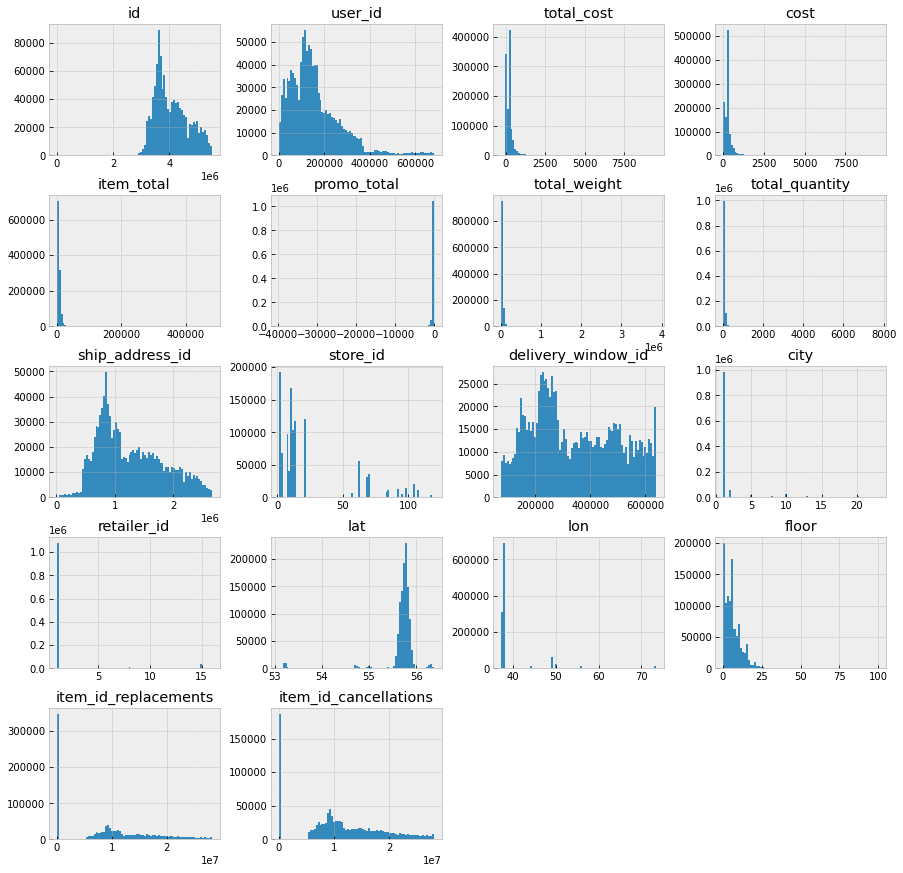

In [9]:
# Гистограмма распределения значений 
sber_market_db_num.hist(bins=80, figsize=(15,15))
plt.show()

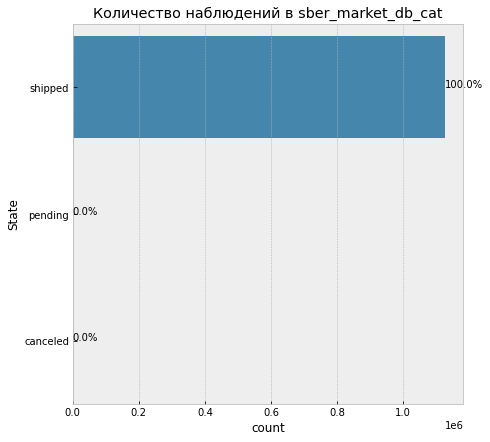

In [10]:
# Количество наблюдений в номинальной переменной
f, ax = plt.subplots(figsize=(7,7))
sns.countplot(y=sber_market_db_cat.state, order = sber_market_db_cat.state.value_counts().index);
ax.set_title('Количество наблюдений в sber_market_db_cat');
ax.set(ylabel='State')

total = len(sber_market_db_cat['state'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

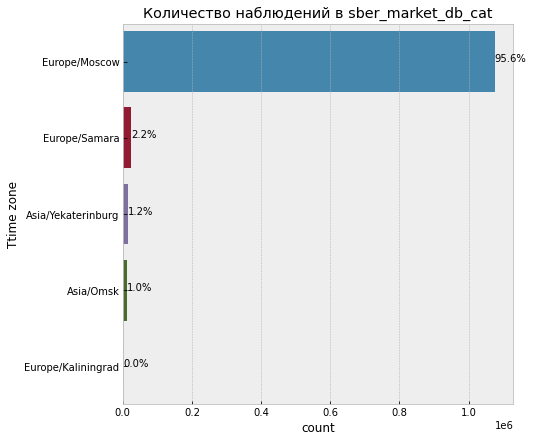

In [11]:
# Количество наблюдений в номинальной переменной
f, ax = plt.subplots(figsize=(7,7))
sns.countplot(y=sber_market_db_cat.time_zone, order = sber_market_db_cat.time_zone.value_counts().index);
ax.set_title('Количество наблюдений в sber_market_db_cat');
ax.set(ylabel='Ttime zone')

total = len(sber_market_db_cat['time_zone'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

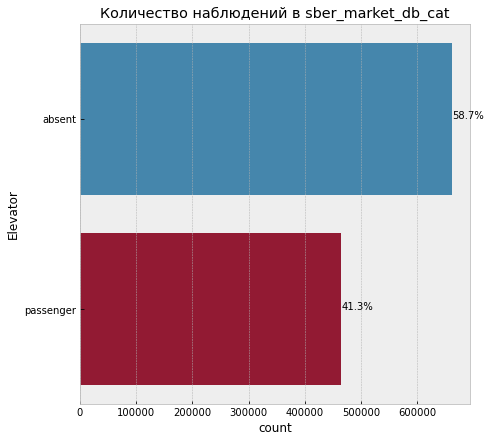

In [12]:
# Количество наблюдений в номинальной переменной
f, ax = plt.subplots(figsize=(7,7))
sns.countplot(y=sber_market_db_cat.elevator, order = sber_market_db_cat.elevator.value_counts().index);
ax.set_title('Количество наблюдений в sber_market_db_cat');
ax.set(ylabel='Elevator')

total = len(sber_market_db_cat['elevator'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

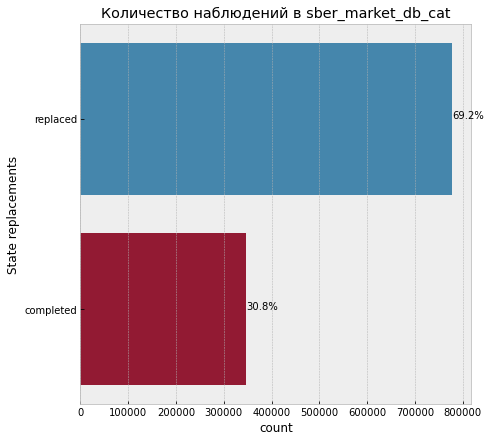

In [13]:
# Количество наблюдений в номинальной переменной
f, ax = plt.subplots(figsize=(7,7))
sns.countplot(y=sber_market_db_cat.state_replacements, order = sber_market_db_cat.state_replacements.value_counts().index);
ax.set_title('Количество наблюдений в sber_market_db_cat');
ax.set(ylabel='State replacements')

total = len(sber_market_db_cat['state_replacements'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

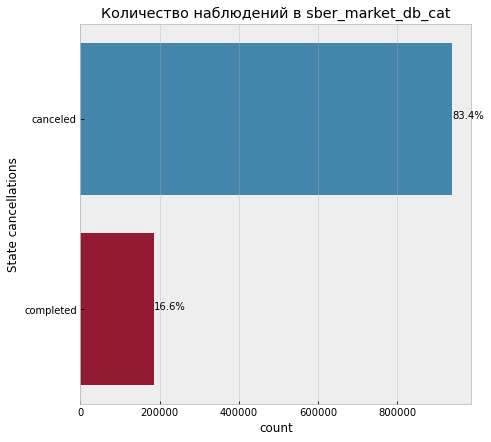

In [14]:
# Количество наблюдений в номинальной переменной
f, ax = plt.subplots(figsize=(7,7))
sns.countplot(y=sber_market_db_cat.state_cancellations, order = sber_market_db_cat.state_cancellations.value_counts().index);
ax.set_title('Количество наблюдений в sber_market_db_cat');
ax.set(ylabel='State cancellations')

total = len(sber_market_db_cat['state_cancellations'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.show()

### _Outliers detection_

---

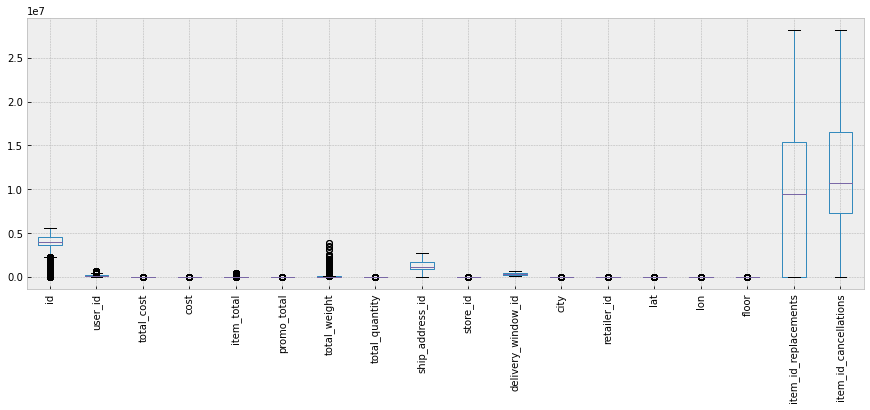

In [15]:
sber_market_db_num.boxplot(figsize=(15,5), rot=90)
plt.show()

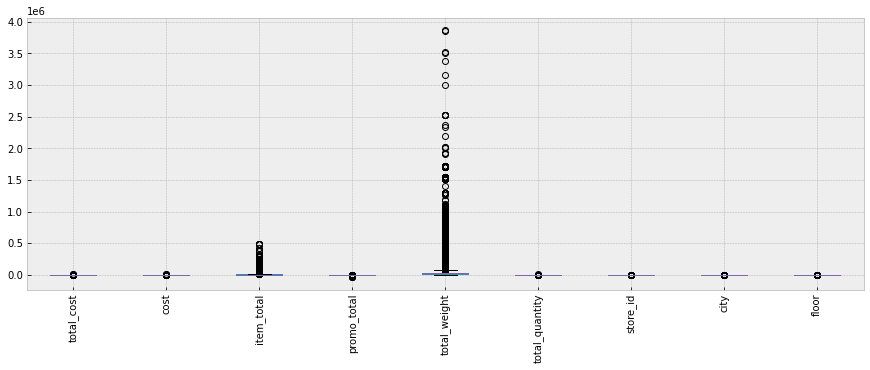

In [16]:
sber_market_db_num[[
 'total_cost',
 'cost',
 'item_total',
 'promo_total',
 'total_weight',
 'total_quantity',
 'shipped_at',
 'created_at',
 'store_id',
 'starts_at',
 'ends_at',
 'city',
 'floor']].boxplot(figsize=(15,5), rot=90)
plt.show()

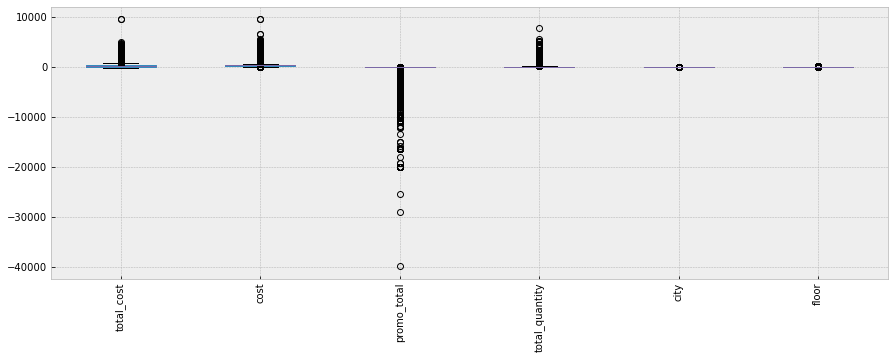

In [17]:
sber_market_db_num[[
 'total_cost',
 'cost',
 'promo_total',
 'total_quantity',
 'shipped_at',
 'created_at',
 'starts_at',
 'ends_at',
 'city',
 'floor']].boxplot(figsize=(15,5), rot=90)
plt.show()

### _Exploring Relationships_

---

<AxesSubplot:xlabel='lon', ylabel='lat'>

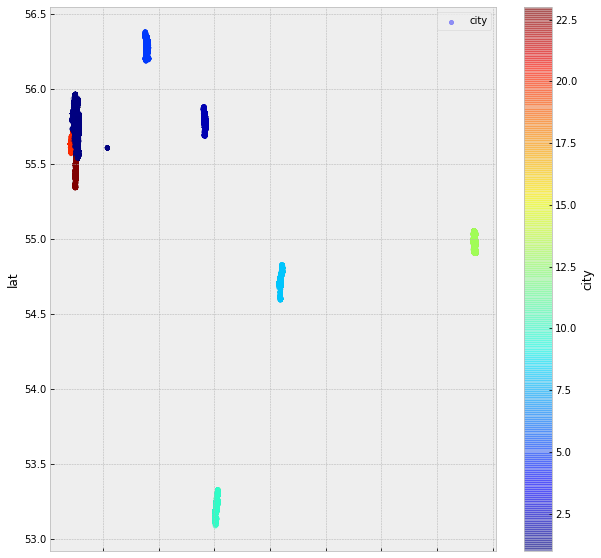

In [18]:
sber_market_db_num.plot(kind="scatter", x='lon', y='lat', alpha=0.4, figsize=(10,10), c='city', cmap=plt.get_cmap('jet'), colorbar=True, label='city')

<AxesSubplot:xlabel='lon', ylabel='lat'>

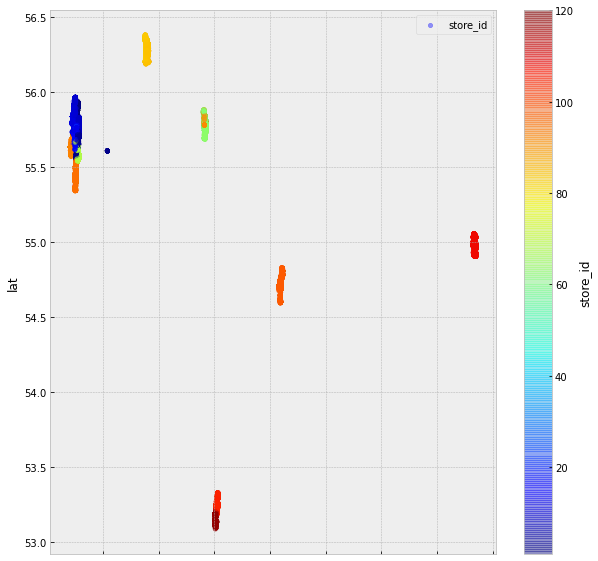

In [19]:
sber_market_db_num.plot(kind="scatter", x='lon', y='lat', alpha=0.4, figsize=(10,10), c='store_id', cmap=plt.get_cmap('jet'), colorbar=True, label='store_id')

<AxesSubplot:xlabel='lon', ylabel='lat'>

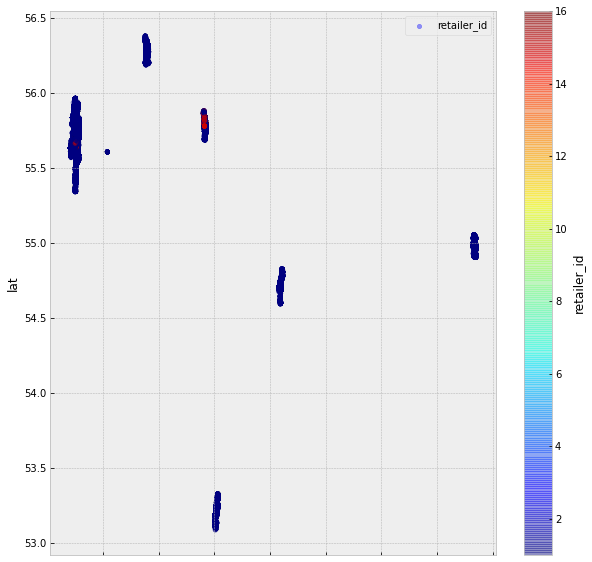

In [20]:
sber_market_db_num.plot(kind="scatter", x='lon', y='lat', alpha=0.4, figsize=(10,10), c='retailer_id', cmap=plt.get_cmap('jet'), colorbar=True, label='retailer_id')

### _Correlation analysis_

---

<AxesSubplot:>

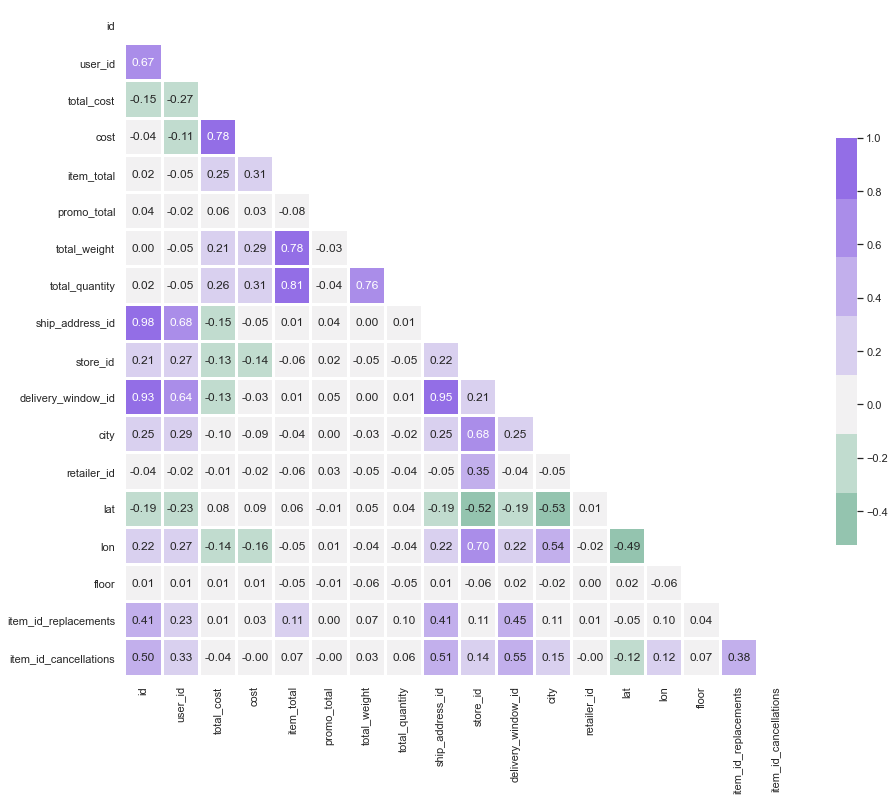

In [21]:
# Постороение диагональной корриляционной матрицы.

sns.set_theme(style="white")
# Compute the correlation matrix
corr = sber_market_db_num.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, )

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=2, cbar_kws={"shrink": .5})

### _Time Series Analysis_

---

In [49]:
 sber_market_db[["starts_at", 'total_weight']].plot(figsize=(18,8), legend=True)

<AxesSubplot:>

ValueError: Date ordinal 4057200.0 converts to 13078-03-28T00:00:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 1296x576 with 1 Axes>

In [25]:
plt.style.use('bmh') 

In [39]:
ts_df = pd.DataFrame()

ts_df["shipped_at"] = sber_market_db.groupby("shipped_at")['total_weight'].count()

ts_df["created_at"] = sber_market_db.groupby(['created_at'])['total_weight'].count()

ts_df["starts_at"] = sber_market_db.groupby("starts_at")['total_weight'].count()

ts_df["ends_at"] = sber_market_db.groupby(['ends_at'])['total_weight'].count()


# rolling_1 = ts_df["starts_at"].rolling(window=14).mean()
# rolling_2= ts_df["created_at"].rolling(window=14).mean()

<AxesSubplot:xlabel='shipped_at'>

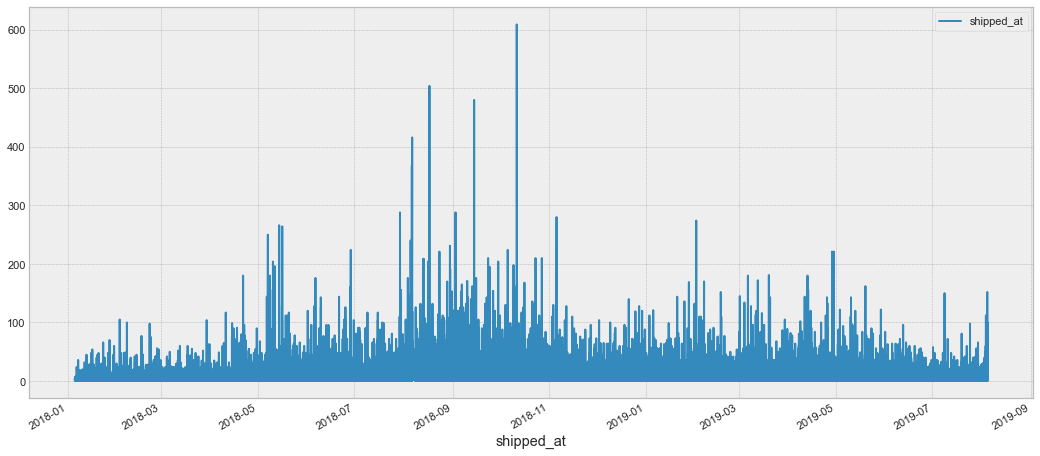

In [44]:
# fig, ax = plt.subplots(1,3, figsize=(25, 5), dpi= 180)

ts_df["shipped_at"].plot(figsize=(18,8), legend=True)


# ts_df["created_at"].plot(legend=True)
# rolling_2.plot(color='red')

<AxesSubplot:xlabel='shipped_at'>

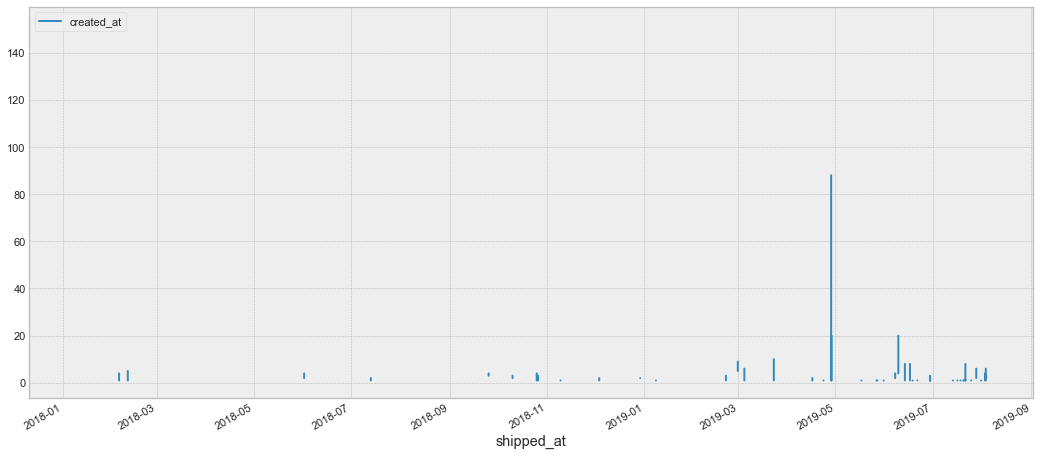

In [45]:
ts_df["created_at"].plot(figsize=(18,8), legend=True)

<AxesSubplot:xlabel='shipped_at'>

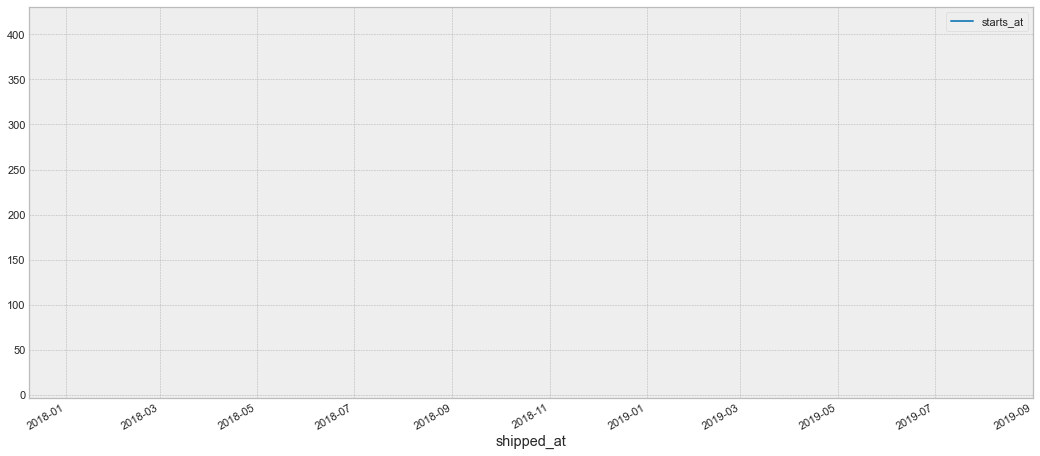

In [46]:
ts_df["starts_at"].plot(figsize=(18,8), legend=True)

<AxesSubplot:xlabel='shipped_at'>

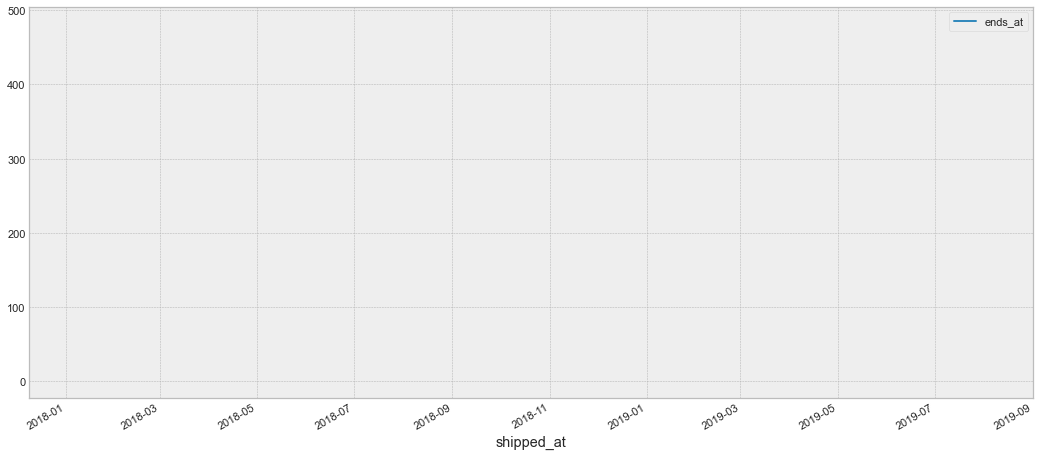

In [47]:
ts_df["ends_at"].plot(figsize=(18,8), legend=True)

<AxesSubplot:xlabel='shipped_at'>

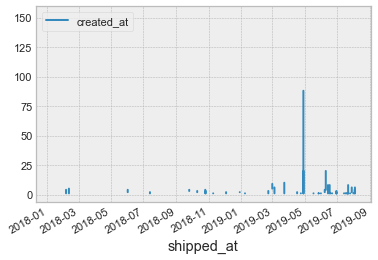

In [37]:
ts_df["created_at"].plot(legend=True)
rolling_2.plot(color='red')

### _Grouping Datasets_

---


## SECTION 5.2 CONCLUSIONS